In [1]:
!python --version

Python 3.10.9


In [2]:
!pip install torch==1.7.1
!pip install ftfy regex tqdm

ERROR: Could not find a version that satisfies the requirement torch==1.7.1 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0)
ERROR: No matching distribution found for torch==1.7.1


In [3]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to c:\users\ching\appdata\local\temp\pip-req-build-h4nlfwn1
  Resolved https://github.com/openai/CLIP.git to commit a9b1bf5920416aaeaec965c25dd9e8f98c864f16
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git 'C:\Users\Ching\AppData\Local\Temp\pip-req-build-h4nlfwn1'


# CLIP model

In [4]:
import torch
import clip

c:\Users\Ching\anaconda3\envs\food\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# load model and img preprocessing
model, preprocess = clip.load("ViT-B/32", device=device,jit = False)

提取圖像嵌入

In [6]:
from PIL import Image
import requests

# # 設置圖片的 URL
# image_name = "pexels-photo-1485637.jpeg"
# image_url = f"https://images.pexels.com/photos/1485637/{image_name}?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940"

# # 加載圖片
# image = Image.open(requests.get(image_url, stream=True).raw)
# print("Image to be processed")
# display(image)

# # 預處理圖像
# image = preprocess(image).unsqueeze(0).to(device)
# print("\n\nTensor shape:")
# print(image.shape)

Image to be processed


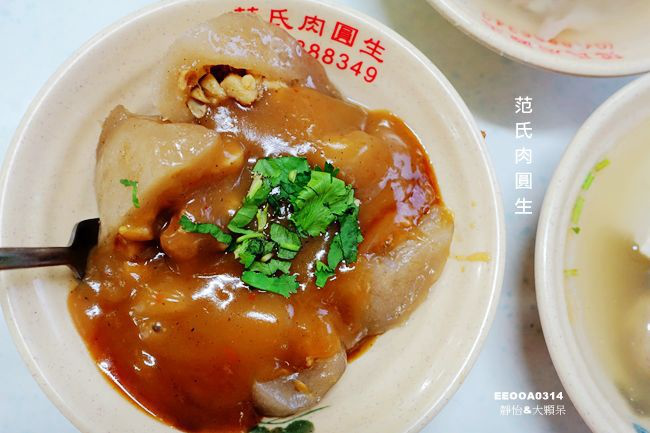



Tensor shape:
torch.Size([1, 3, 224, 224])


In [7]:
# 加載圖片
image = Image.open("pic/1.jpg")
print("Image to be processed")
display(image)

# 預處理圖像
image = preprocess(image).unsqueeze(0).to(device)
print("\n\nTensor shape:")
print(image.shape)

通過調用CLIP模型中的"encode_image"提圖像特徵，如下所示

In [8]:
with torch.no_grad():
  image_features = model.encode_image(image)
print(image_features.shape)

torch.Size([1, 512])


提取文本嵌入

創建文本片段，以下方方式嵌入不同的類值：“類的照片”
使用clip-tokenizer欲處理文本片段。

In [9]:
text_snippets = ["a photo of a Cantonese porridge, which is a food",
         "a photo of a Fried Rice with Shrimp and Egg, which is a food",
         "a photo of a alkaline rice dumplings, which is a food",
         "a photo of a barley kernel, which is a food",
         "a photo of a beer, which is a food",
         "a photo of a green asparagus, which is a food",
         "a photo of a ham_fried_rice, which is a food",
         "a photo of a red wine, which is a food",
         "a photo of a cheese cake, which is a food",
         "a photo of a steak, which is a food",
         "a photo of a Ba wan, which is a food",
         "a photo of a fried Taiwan snapper fillets"
         ]

Text_map ={0:"Cantonese porridge",
      1:"Fried Rice with Shrimp and Egg",
      2:"alkaline rice dumplings",
      3:"barley kernel",
      4:"beer",
      5:"green asparagus",
      6:"ham_fried_rice",
      7:"red wine",
      8:"cheese cake",
      9:"steak",
      10:"Ba wan",
      11:"fried Taiwan snapper fillets"}

# 預處理文本
text = clip.tokenize(text_snippets).to(device)
print(text.shape)

torch.Size([12, 77])


從CLIP模型中調用“encode_text”來提取文本特征

In [10]:
with torch.no_grad():
  text_features = model.encode_text(text)
print(text_features.shape)

torch.Size([12, 512])


比較圖像和文本

比較每個組合，並根據相似性對它們進行排序

在兩個嵌入上調用模型並計算softmax

In [11]:
with torch.no_grad():
  logits_per_image, logits_per_text = model(image,text)
  probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", probs)

Label probs: [[7.1947289e-01 2.9781570e-05 2.2097779e-02 7.1061477e-05 4.2332991e-05
  3.5344558e-06 1.2812957e-04 1.2266940e-05 7.3965252e-06 7.1097911e-06
  2.5727734e-01 8.5032301e-04]]


In [12]:
import numpy as np

np.shape(probs)

(1, 12)

將結果畫出來

In [ ]:
import matplotlib.pyplot as plt
plt.bar(Text_map.values(),probs.reshape(-1), .5)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
predict_label = np.argmax(probs)